机器学习实践之模型评估

评估流程1：将整个数据集用于训练和测试
使用整个数据集进行模型训练
使用相同的数据集进行测试，对比预测结果和实际结果评估模型表现

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(x,y)
pre1 = knn1.predict(x)
print(pre1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# 准确率计算
from sklearn.metrics import accuracy_score
print(accuracy_score(y, pre1))

1.0


In [4]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(x,y)
pre5 = knn5.predict(x)
print(accuracy_score(y, pre5))

0.9666666666666667


评估流程2：测试数据和训练数据分离
把数据分成两部分，测试集和训练集
使用训练集进行模型训练
使用测试集进行预测，从而评估模型表现

In [5]:
#数据分离
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(90, 4) (90,) (60, 4) (60,)


In [6]:
k_range = list(range(1, 25))
print(k_range)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [10]:
score_train = []
score_test = []
for x in k_range:
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(x_train, y_train)
    pre_train = knn.predict(x_train)
    score_train.append(accuracy_score(y_train, pre_train))
    pre_test = knn.predict(x_test)
    score_test.append(accuracy_score(y_test, pre_test))
print(score_train)
print(score_test)

[1.0, 0.9888888888888889, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9666666666666667, 0.9888888888888889, 0.9888888888888889, 0.9777777777777777, 0.9888888888888889, 0.9777777777777777, 0.9888888888888889, 0.9888888888888889, 0.9666666666666667, 0.9888888888888889, 0.9777777777777777, 0.9666666666666667, 0.9777777777777777, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9555555555555556, 0.9777777777777777]
[0.9166666666666666, 0.9, 0.95, 0.9166666666666666, 0.95, 0.9333333333333333, 0.95, 0.9333333333333333, 0.95, 0.9333333333333333, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.95, 0.9666666666666667, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9333333333333333, 0.9166666666666666]


Unable to revert mtime: /Library/Fonts


Text(0, 0.5, 'Test Acc')

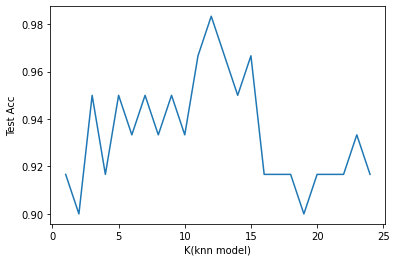

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, score_test)
plt.xlabel('K(knn model)')
plt.ylabel('Test Acc')

Text(0, 0.5, 'Train Acc')

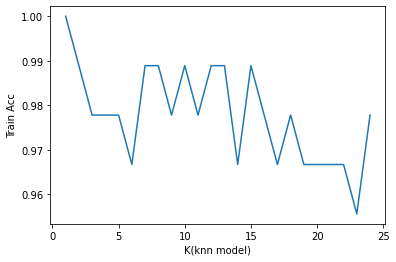

In [12]:
%matplotlib inline
plt.plot(k_range, score_train)
plt.xlabel('K(knn model)')
plt.ylabel('Train Acc')